In [65]:
import pandas as pd
import matplotlib.pyplot as plt #grafik ve görsellestirme
from sklearn.model_selection import train_test_split #test ve eğitim verilerini bölmek için
from sklearn.neighbors import KNeighborsClassifier #knn modeli sınıfı
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
# Karar ağacını görselleştirme (opsiyonel)
from sklearn.tree import plot_tree


In [66]:
df=pd.read_csv('cleaned_data.csv')  

In [67]:
df.head()

,age,self_employed,family_history,treatment,remote_work,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,...,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded
0,46,1,1,0,1,1,1,9,2,0,...,2,1,3,0,0,1,1,0,1,1
1,29,0,1,1,0,0,1,9,2,3,...,0,0,1,2,0,2,2,0,0,0
2,31,1,0,0,1,0,1,9,0,0,...,0,1,1,0,0,2,2,0,2,1
3,46,0,0,1,1,0,1,9,3,2,...,0,2,4,2,0,2,1,0,2,0
4,33,0,1,1,0,0,1,9,1,2,...,1,1,4,0,0,1,1,0,1,2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                754 non-null    int64
 1   self_employed                      754 non-null    int64
 2   family_history                     754 non-null    int64
 3   treatment                          754 non-null    int64
 4   remote_work                        754 non-null    int64
 5   obs_consequence                    754 non-null    int64
 6   gender_standardized                754 non-null    int64
 7   country_encoded                    754 non-null    int64
 8   work_interfere_encoded             754 non-null    int64
 9   no_employees_encoded               754 non-null    int64
 10  benefits_encoded                   754 non-null    int64
 11  care_options_encoded               754 non-null    int64
 12  wellness_program_encod

In [69]:
df.shape

(754, 23)

In [70]:
df.treatment.value_counts()

treatment
1    471
0    283
Name: count, dtype: int64

In [71]:
# 2. Hedef Değişkeni ve Özelliklerin Seçilmesi
X = df.drop(columns=["treatment"])  # Özellikler
y = df["treatment"]  # Hedef değişken


# 4. Eğitim ve Test Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Karar Ağaçları

       Metrik     Değer
0    Doğruluk  0.668874
1  Hassasiyet  0.717391
2  Duyarlılık  0.733333
3    F1 Skoru  0.725275


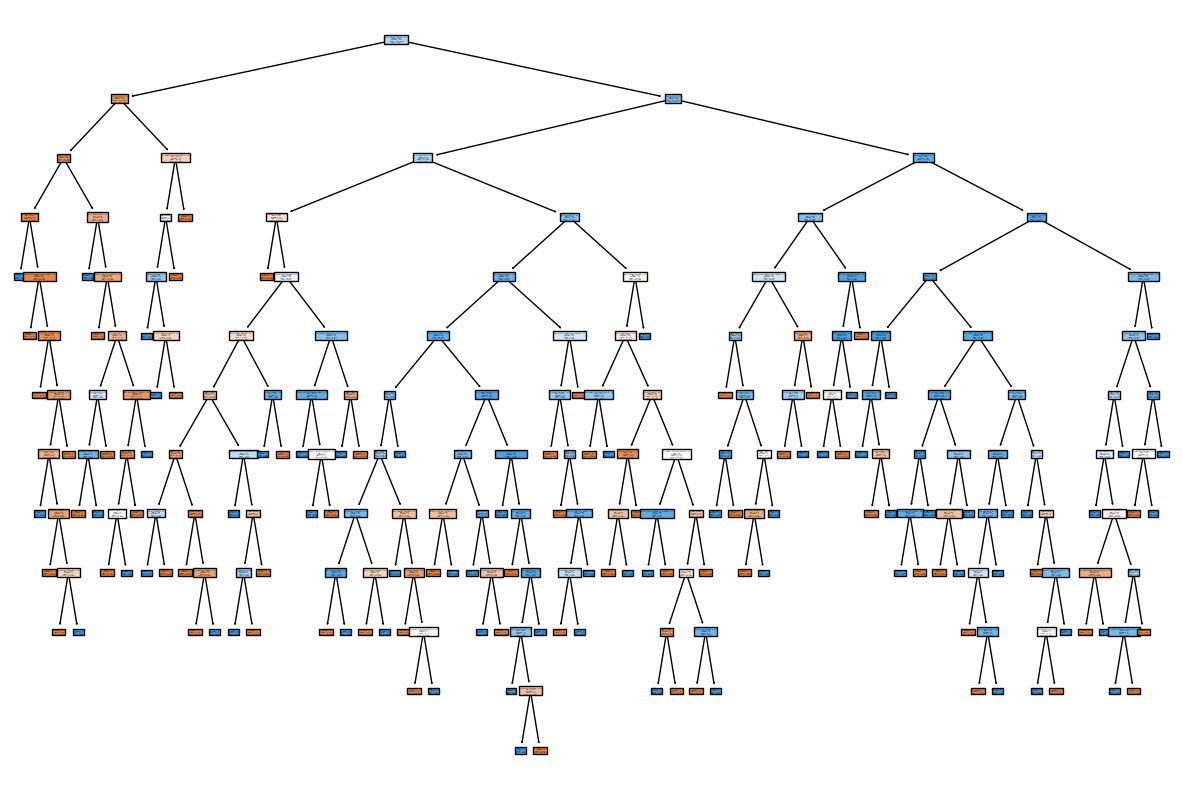

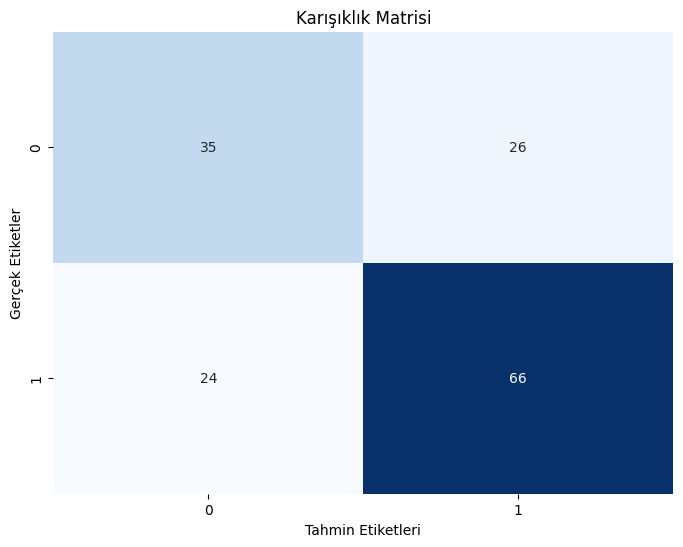

In [72]:
# Decision Tree modelini oluşturma
dt_model = DecisionTreeClassifier(random_state=42)

# Modeli eğitme
dt_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Performans metriklerini içeren bir veri çerçevesi oluşturma
performans_tablosu = pd.DataFrame({
    'Metrik': ['Doğruluk', 'Hassasiyet', 'Duyarlılık', 'F1 Skoru'],
    'Değer': [accuracy, precision, recall, f1]
})

# Tabloyu yazdırma
print(performans_tablosu)

# Karar ağacını görselleştirme (opsiyonel)
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Not Spam", "Spam"])
plt.show()

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()



# Standartlaştırma

In [73]:

# Özellikleri standartlaştır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Eğitim setine fit et ve dönüştür
X_test = scaler.transform(X_test)  # Test setini dönüştür


# Destek Vektör Makineleri (SVM)

In [74]:

# SVM modelini oluştur ve eğit
model = SVC(kernel='linear')  # Kernel türünü değiştirebilirsiniz (örneğin, 'rbf', 'poly')
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Sonuçları değerlendir
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46 15]
 [10 80]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        61
           1       0.84      0.89      0.86        90

    accuracy                           0.83       151
   macro avg       0.83      0.82      0.83       151
weighted avg       0.83      0.83      0.83       151



knn

In [88]:
knn = KNeighborsClassifier (n_neighbors=7)
knn.fit(X_train,y_train)

# KNN modelinin tahminleri
y_pred = knn.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Performans metriklerini içeren bir veri çerçevesi oluşturma
performans_tablosu = pd.DataFrame({
    'Metrik': ['Doğruluk', 'Hassasiyet', 'Duyarlılık', 'F1 Skoru'],
    'Değer': [accuracy, precision, recall, f1]
})

# Tabloyu yazdırma
print(performans_tablosu)

       Metrik     Değer
0    Doğruluk  0.754967
1  Hassasiyet  0.773196
2  Duyarlılık  0.833333
3    F1 Skoru  0.802139


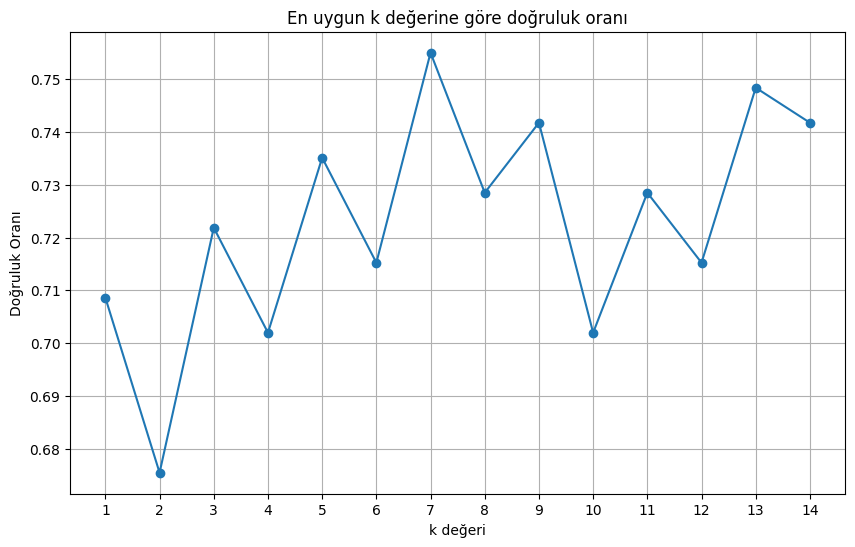

In [76]:
# dogruluk oranını yukseltmek icin en iyi knn degerini veren:
score_list = []

for k in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    score_list.append(knn_model.score(X_test, y_test))

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), score_list, marker='o')
plt.title("En uygun k değerine göre doğruluk oranı")
plt.xlabel("k değeri")
plt.ylabel("Doğruluk Oranı")
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

/var/folders/6m/v9w61ft953s0jkncysm4j8mw0000gn/T/ipykernel_2065/4148244843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metrik', y='Değer', data=performans_tablosu, palette='viridis')


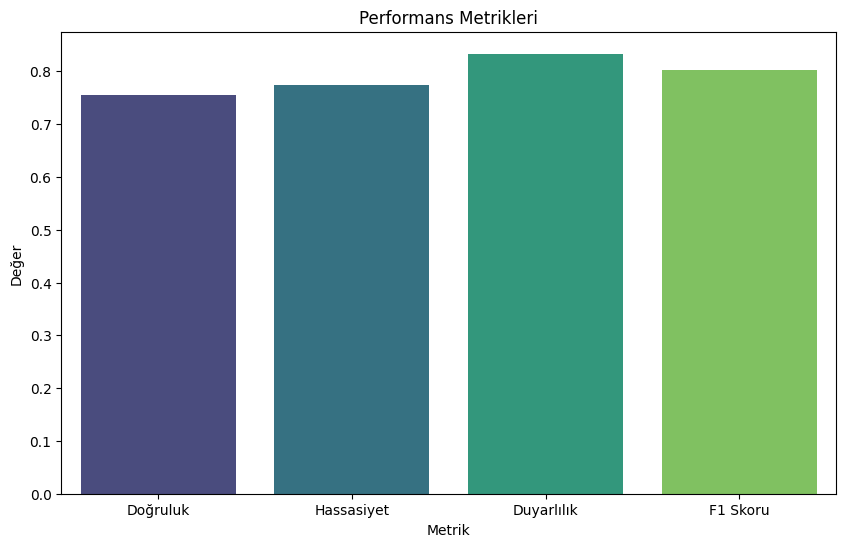

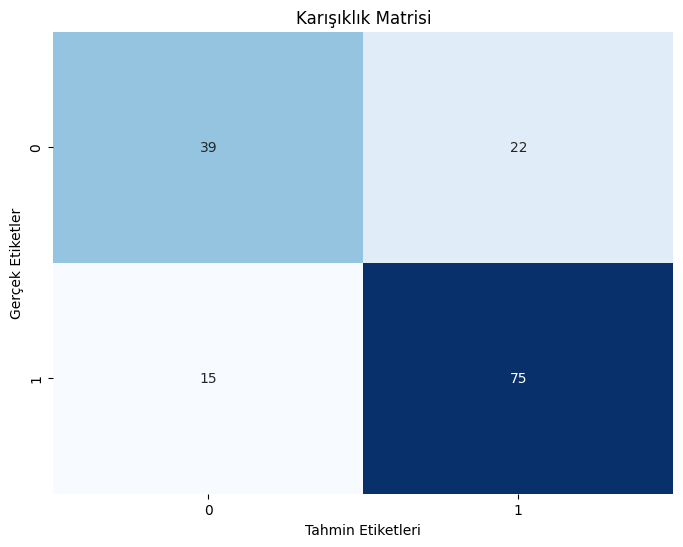

In [89]:
# Performans metriklerini görselleştirme
plt.figure(figsize=(10, 6))

# Doğruluk, Hassasiyet, Duyarlılık ve F1 Skoru için çubuk grafiği
sns.barplot(x='Metrik', y='Değer', data=performans_tablosu, palette='viridis')
plt.title('Performans Metrikleri')
plt.show()

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

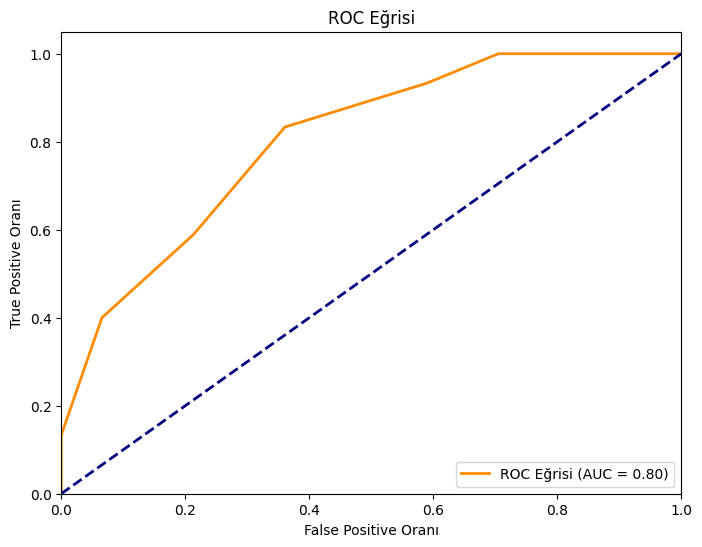

In [90]:
from sklearn.metrics import roc_curve, auc

# KNN modelinin tahmin olasılıklarını al
y_prob = knn.predict_proba(X_test)[:, 1]

# ROC eğrisini oluştur
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [91]:
# SVM modelini oluşturma
svm_model = SVC(kernel='linear', C=1)  # Lineer SVM kullanılacak, C parametresi düzenleme parametresidir.

In [92]:
# Modeli eğitme
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [93]:
# Test seti üzerinde tahmin yapma
y_pred = svm_model.predict(X_test)

In [94]:
# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [95]:
# Performans metriklerini içeren bir veri çerçevesi oluşturma
performans_tablosu = pd.DataFrame({
    'Metrik': ['Doğruluk', 'Hassasiyet', 'Duyarlılık', 'F1 Skoru'],
    'Değer': [accuracy, precision, recall, f1]
})

# Tabloyu yazdırma
print(performans_tablosu)

       Metrik     Değer
0    Doğruluk  0.834437
1  Hassasiyet  0.842105
2  Duyarlılık  0.888889
3    F1 Skoru  0.864865


/var/folders/6m/v9w61ft953s0jkncysm4j8mw0000gn/T/ipykernel_2065/4148244843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metrik', y='Değer', data=performans_tablosu, palette='viridis')


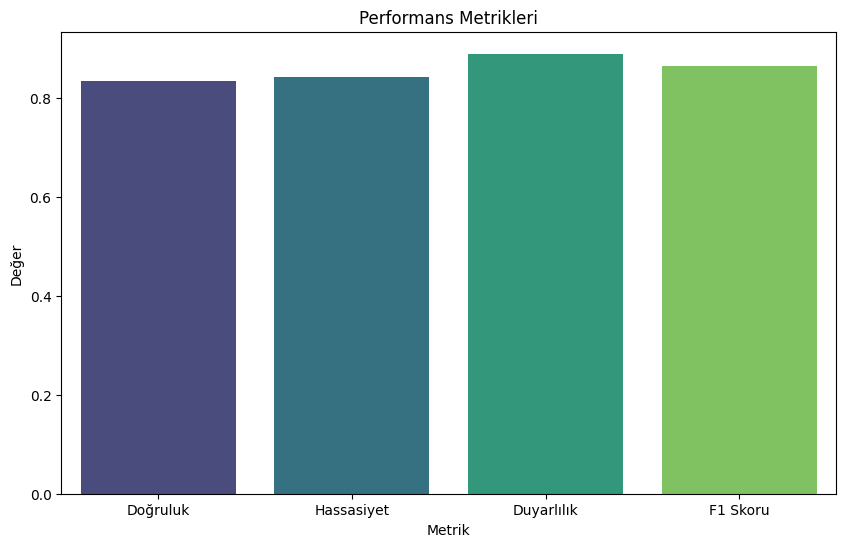

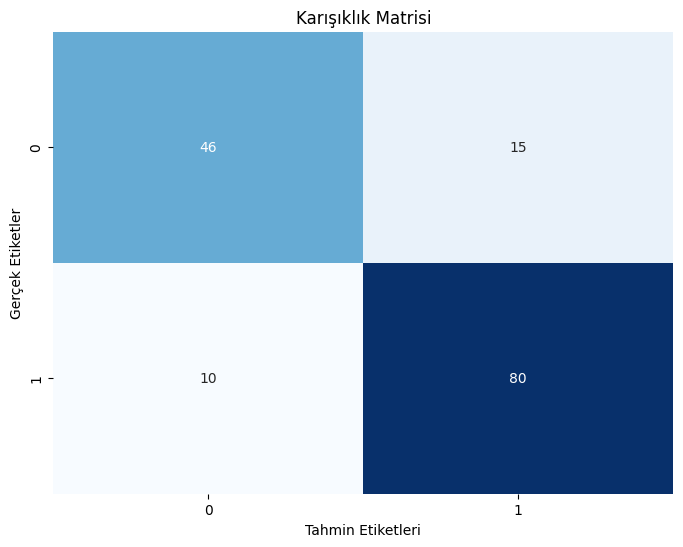

In [97]:
# Performans metriklerini görselleştirme
plt.figure(figsize=(10, 6))

# Doğruluk, Hassasiyet, Duyarlılık ve F1 Skoru için çubuk grafiği
sns.barplot(x='Metrik', y='Değer', data=performans_tablosu, palette='viridis')
plt.title('Performans Metrikleri')
plt.show()

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

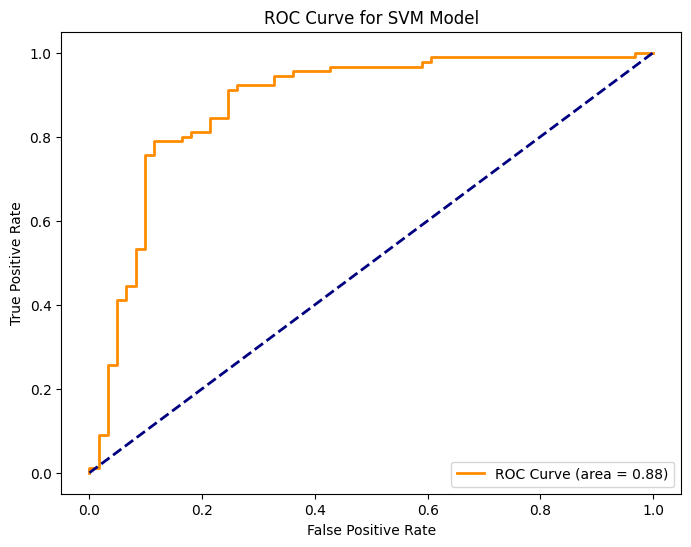

In [98]:
# SVM modelinin tahmin olasılıklarını al
y_prob = svm_model.decision_function(X_test)

# ROC eğrisini oluştur
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()